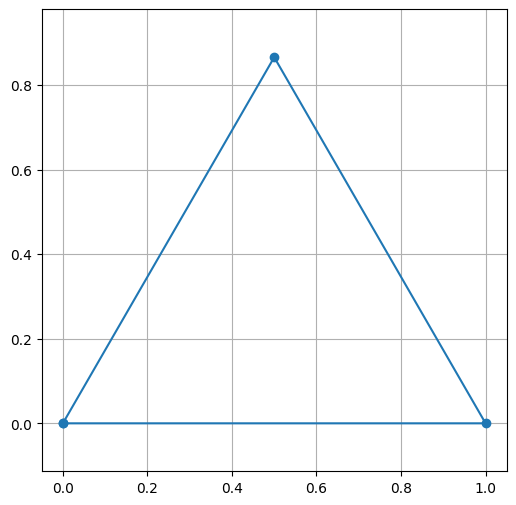

In [12]:
#gluing triangles
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Button, VBox
from IPython.display import display, clear_output

# INITIAL TRIANGLE COORDINATES (ABC)
triangles = [np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])]  # First triangle ABC

# FUNCTION TO DRAW TRIANGLES
def plot_triangles():
    plt.figure(figsize=(6, 6))
    plt.axis('equal')
    plt.grid(True)
    
    for triangle in triangles:
        x = np.append(triangle[:, 0], triangle[0, 0])  # Close the triangle loop
        y = np.append(triangle[:, 1], triangle[0, 1])
        plt.plot(x, y, marker='o')
    
    plt.show()

# FUNCTION TO ADD NEW TRIANGLE
def add_triangle(b):
    last_triangle = triangles[-1]
    A, B, C = last_triangle

    # CALCULATE NEW POINT D BASED ON THE LAST SHARED EDGE (BC)
    # Rotate point A around BC to form a new triangle
    vector = B - C
    rotation_matrix = np.array([[0, -1], [1, 0]])  # 90-degree rotation
    new_point = C + rotation_matrix @ vector

    new_triangle = np.array([B, C, new_point])  # New triangle BCD
    triangles.append(new_triangle)

    clear_output(wait=True)
    display(ui)
    plot_triangles()

# BUTTON WIDGET
next_button = Button(description="Next Triangle")
next_button.on_click(add_triangle)

# UI LAYOUT
ui = VBox([next_button])

# INITIAL DISPLAY
display(ui)
plot_triangles()




In [ ]:
# VERSION 1.0: INTERACTIVE JUPYTER NOTEBOOK UI FOR ONTOLOGY DESIGN PATTERNS
# THIS CODE CREATES A UI WITH THREE BUTTONS:
#   (1) "Generate Ontology" takes a user concept (e.g., "food") and calls the LLM to generate an ontology.
#   (2) "Create Related Ontology" uses the original ontology to generate a related ontology.
#   (3) "Glue Ontologies" integrates the original and related ontologies.
#
# IMPORTANT: Ensure that the variable "client" is correctly instantiated and authenticated 
# for your LLM API before executing this code.

import ipywidgets as widgets
from IPython.display import display, clear_output

# =======================
# BEGIN: USER CONFIGURABLE AREA
# =======================
# If not already defined, instantiate your LLM client here.
# For example:
from anthropic import Anthropic
client = anthropic.Anthropic()
# =======================

def generate_ontology(concept):
    """
    Generates an ontology for the given concept using robust system prompts.
    
    This function calls the LLM API using the provided syntax and returns a detailed, structured ontology.
    """
    system_prompt = (
        "You are an expert ontology engineer proficient in ontology design patterns. "
        "Given the concept '{}', generate a detailed and structured ontology that clearly delineates hierarchical relationships "
        "and conceptual entities. Provide the output in a concise machine-readable format (e.g., JSON) without extraneous commentary."
    ).format(concept)
    
    user_prompt = "Generate an ontology for the concept: '{}'.".format(concept)
    
    # LLM API call using provided syntax (DO NOT MODIFY the structure unless you understand the API contract)
    message = client.messages.create(
        model="claude-3-5-sonnet-20241022",  # Use the specified model
        max_tokens=8192,
        temperature=0,
        system=system_prompt,  # SYSTEM PROMPT: Ontology generation instructions
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": user_prompt
                    }
                ]
            }
        ]
    )
    return message.content[0].text.strip()

def generate_related_ontology(original_ontology):
    """
    Generates a related ontology based on the provided original ontology.
    
    The system prompt instructs the LLM to produce a logically adjacent ontology (e.g., for "food" it might yield "nutrition" or "food services").
    """
    system_prompt = (
        "You are an expert in conceptual mapping and ontology engineering. "
        "Based on the provided ontology, generate a related ontology that is logically adjacent and complementary. "
        "For example, if the original ontology is about 'food', consider related domains such as 'food services' or 'nutrition'. "
        "Present your response in a detailed, machine-readable format (e.g., JSON) using ontology design patterns."
    )
    
    user_prompt = "Given the original ontology:\n{}\nGenerate a related ontology:".format(original_ontology)
    
    message = client.messages.create(
        model="claude-3-5-sonnet-20241022",
        max_tokens=8192,
        temperature=0,
        system=system_prompt,  # SYSTEM PROMPT: Related ontology generation instructions
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": user_prompt
                    }
                ]
            }
        ]
    )
    return message.content[0].text.strip()

def glue_ontologies(original_ontology, related_ontology):
    """
    Integrates (glues) the original and related ontologies into a unified ontology.
    
    The system prompt directs the LLM to merge the two ontologies using established ontology design patterns, 
    ensuring structural and semantic consistency.
    """
    system_prompt = (
        "You are a master of ontology integration and logical structuring. "
        "Given two ontologies, integrate them seamlessly using established ontology design patterns. "
        "Ensure that the merged ontology preserves domain-specific semantics and structural consistency. "
        "Output the unified ontology in a detailed, machine-readable format (e.g., JSON)."
    )
    
    user_prompt = (
        "Original Ontology:\n{}\n\nRelated Ontology:\n{}\n\nPlease generate a unified, integrated ontology:"
    ).format(original_ontology, related_ontology)
    
    message = client.messages.create(
        model="claude-3-5-sonnet-20241022",
        max_tokens=8192,
        temperature=0,
        system=system_prompt,  # SYSTEM PROMPT: Ontology integration instructions
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": user_prompt
                    }
                ]
            }
        ]
    )
    return message.content[0].text.strip()

# ------------------------
# Interactive UI Setup
# ------------------------

# Text input widget for the concept
concept_input = widgets.Text(
    value='food',
    description='Concept:',
    placeholder='Enter a concept (e.g., food)',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Button to generate the ontology from the concept
generate_button = widgets.Button(
    description='Generate Ontology',
    button_style='success'
)

# Button to generate a related ontology (initially disabled until an ontology is generated)
related_button = widgets.Button(
    description='Create Related Ontology',
    button_style='info',
    disabled=True
)

# Button to glue the ontologies together (initially disabled until both ontologies are available)
glue_button = widgets.Button(
    description='Glue Ontologies',
    button_style='warning',
    disabled=True
)

# Output area to display the results and status messages
output_area = widgets.Output()

# Global state variables to hold generated ontologies.
original_ontology = None
related_ontology = None

# ------------------------
# Event Handlers
# ------------------------

def on_generate_clicked(b):
    global original_ontology, related_ontology
    with output_area:
        clear_output()
        print("Generating ontology for concept: '{}'...".format(concept_input.value))
    try:
        # Generate the original ontology using the LLM API call
        original_ontology = generate_ontology(concept_input.value)
        with output_area:
            print("Original Ontology:\n", original_ontology)
        # Enable the related ontology button
        related_button.disabled = False
        glue_button.disabled = True  # Reset glue button until related ontology is generated
    except Exception as e:
        with output_area:
            print("Error during ontology generation:", e)

def on_related_clicked(b):
    global related_ontology
    if original_ontology is None:
        with output_area:
            print("Original ontology has not been generated yet.")
        return
    with output_area:
        print("Generating related ontology based on the original ontology...")
    try:
        # Generate the related ontology using the LLM API call
        related_ontology = generate_related_ontology(original_ontology)
        with output_area:
            print("Related Ontology:\n", related_ontology)
        # Enable the glue ontologies button
        glue_button.disabled = False
    except Exception as e:
        with output_area:
            print("Error during related ontology generation:", e)

def on_glue_clicked(b):
    if original_ontology is None or related_ontology is None:
        with output_area:
            print("Both ontologies must be generated before gluing.")
        return
    with output_area:
        print("Integrating original and related ontologies...")
    try:
        # Glue the ontologies together using the LLM API call
        glued_ontology = glue_ontologies(original_ontology, related_ontology)
        with output_area:
            print("Glued Ontology:\n", glued_ontology)
    except Exception as e:
        with output_area:
            print("Error during ontology integration:", e)


# ------------------------
# adding visualization
# ------------------------


# Add these imports at the top with the other imports
import networkx as nx
import matplotlib.pyplot as plt
import json

def create_graph_from_ontology(ontology_json):
    """
    Creates a NetworkX graph from an ontology JSON string.
    Assumes the ontology is in a hierarchical JSON format.
    """
    try:
        # Parse the JSON string
        data = json.loads(ontology_json)
        
        # Create a directed graph
        G = nx.DiGraph()
        
        def add_nodes_edges(obj, parent=None):
            for key, value in obj.items():
                G.add_node(key)
                if parent:
                    G.add_edge(parent, key)
                if isinstance(value, dict):
                    add_nodes_edges(value, key)
                elif isinstance(value, list):
                    for item in value:
                        if isinstance(item, dict):
                            add_nodes_edges(item, key)
                        else:
                            G.add_node(item)
                            G.add_edge(key, item)
        
        add_nodes_edges(data)
        return G
    except json.JSONDecodeError:
        print("Error: Could not parse ontology JSON")
        return None

def visualize_ontology(G, title):
    """
    Creates a visualization of the ontology graph.
    """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    
    # Use spring layout for graph visualization
    pos = nx.spring_layout(G, k=1, iterations=50)
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
           node_size=2000, font_size=8, font_weight='bold',
           arrows=True, edge_color='gray', arrowsize=20)
    
    plt.tight_layout()
    return plt.gcf()

# Update the event handlers to include visualization

def on_generate_clicked(b):
    global original_ontology
    with output_area:
        clear_output()
        print("Generating ontology for concept: '{}'...".format(concept_input.value))
    try:
        original_ontology = generate_ontology(concept_input.value)
        with output_area:
            print("Original Ontology:\n", original_ontology)
            # Create and display visualization
            G = create_graph_from_ontology(original_ontology)
            if G:
                fig = visualize_ontology(G, f"Original Ontology: {concept_input.value}")
                plt.show()
        related_button.disabled = False
        glue_button.disabled = True
    except Exception as e:
        with output_area:
            print("Error during ontology generation:", e)

def on_related_clicked(b):
    global related_ontology
    if original_ontology is None:
        with output_area:
            print("Original ontology has not been generated yet.")
        return
    with output_area:
        print("Generating related ontology based on the original ontology...")
    try:
        related_ontology = generate_related_ontology(original_ontology)
        with output_area:
            print("Related Ontology:\n", related_ontology)
            # Create and display visualization
            G = create_graph_from_ontology(related_ontology)
            if G:
                fig = visualize_ontology(G, "Related Ontology")
                plt.show()
        glue_button.disabled = False
    except Exception as e:
        with output_area:
            print("Error during related ontology generation:", e)

def on_glue_clicked(b):
    if original_ontology is None or related_ontology is None:
        with output_area:
            print("Both ontologies must be generated before gluing.")
        return
    with output_area:
        print("Integrating original and related ontologies...")
    try:
        glued_ontology = glue_ontologies(original_ontology, related_ontology)
        with output_area:
            print("Glued Ontology:\n", glued_ontology)
            # Create and display visualization
            G = create_graph_from_ontology(glued_ontology)
            if G:
                fig = visualize_ontology(G, "Integrated Ontology")
                plt.show()
    except Exception as e:
        with output_area:
            print("Error during ontology integration:", e)





# ------------------------
# Bind Event Handlers to Buttons
# ------------------------

generate_button.on_click(on_generate_clicked)
related_button.on_click(on_related_clicked)
glue_button.on_click(on_glue_clicked)

# ------------------------
# Display the UI
# ------------------------

ui = widgets.VBox([
    concept_input,
    generate_button,
    related_button,
    glue_button,
    output_area
])
display(ui)
